1. Graphical analysis
2. grouping
3. Dummies
4. Decision tree analysis


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
filepath = "loans.csv"
loans = pd.read_csv(filepath)

In [4]:
loans.head()

,Loan Amount,Loan Term,Loan Interest Rate,Loan Approval Date,Initial Rating,Loan Type,First Bid,Age,Gender,Historical Successful Borrowing Count,...,Overdue Days before bid,Bid Status,Installments,Repayment Status,Remaining Principal,Remaining Interest,Verification,Principal Paid PCT,Interest Paid PCT,OverDue
0,3919,12,18.0,Q2,C,normal,0,28,0,4.0,...,0,0,1,0,0.0,0.0,2,1.0,1.0,0
1,3919,12,18.0,Q2,C,normal,0,28,0,4.0,...,0,0,2,0,0.0,0.0,2,1.0,1.0,0
2,3919,12,18.0,Q2,C,normal,0,28,0,4.0,...,0,0,1,0,0.0,0.0,2,1.0,1.0,0
3,3919,12,18.0,Q2,C,normal,0,28,0,4.0,...,0,0,2,0,0.0,0.0,2,1.0,1.0,0
4,3919,12,18.0,Q2,C,normal,0,28,0,4.0,...,0,0,1,0,0.0,0.0,2,1.0,1.0,0


Text(0.5, 1.0, 'Loan Amount')

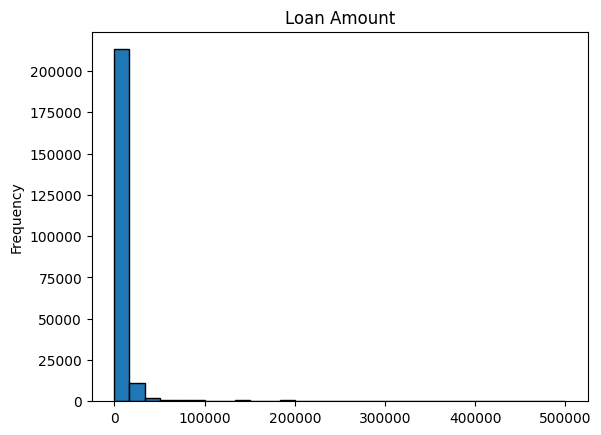

In [5]:
plt.hist(loans['Loan Amount'], bins=30, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Loan Amount')

Given that PaipaiDai is a private financial service institute, which is also considered as a shadow bank. Therefore, it's reasonable to find out users generally asks for a higher amount of loans compared to public financial service institute such as banks, which is more safe and official. We assumes such high loan amount would come along with high interest rate.

Text(0.5, 1.0, 'Loan Amount vs Interest Rate')

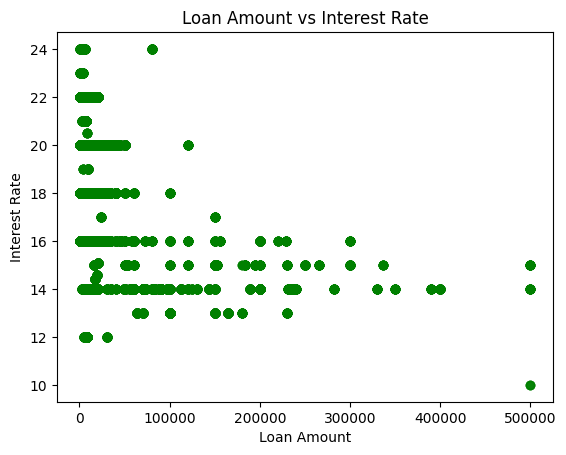

In [6]:
plt.scatter(loans['Loan Amount'], loans['Loan Interest Rate'], color='green', alpha=0.5)
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.title("Loan Amount vs Interest Rate")

- Out of expectation, the graph indicates that interest rate does not grow along with the high loan amount
- However, the general interest rate is relatively high for low loan amount
- we can further investigate it by comparing it with their initial rating

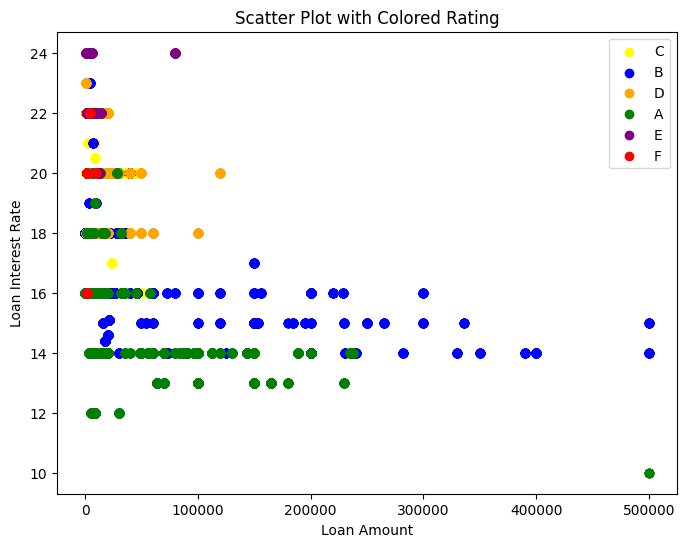

In [7]:
colors = {'A': 'green', 'B': 'blue', 'C': 'yellow', 'D':'orange','E':'purple','F':'red'}

plt.figure(figsize=(8, 6))
for rating in loans['Initial Rating'].unique():
    plt.scatter(loans[loans['Initial Rating'] == rating]['Loan Amount'], loans[loans['Initial Rating'] == rating]['Loan Interest Rate'], 
                color=colors[rating], label=rating)

plt.title('Scatter Plot with Colored Rating')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Interest Rate')
plt.legend()
plt.show()

- This graph proves our assumption that lower rating should still get higher interest rate
- The reason that there would be low interest rate with high loan amount is due to rating, this is probably because borrowers were not able to borrow such high amount of money in the bank, but their financial situation satisfied the requirement of the platform.

In [8]:
# We first group the interest rate into three groups
# 0: <14, 1:14-20, 2: >20
def categorize(value):
    if value < 14:
        return 0
    elif value <20:
        return 1
    else:
        return 2

loans['Loan Interest Rate'] = loans['Loan Interest Rate'].apply(categorize)

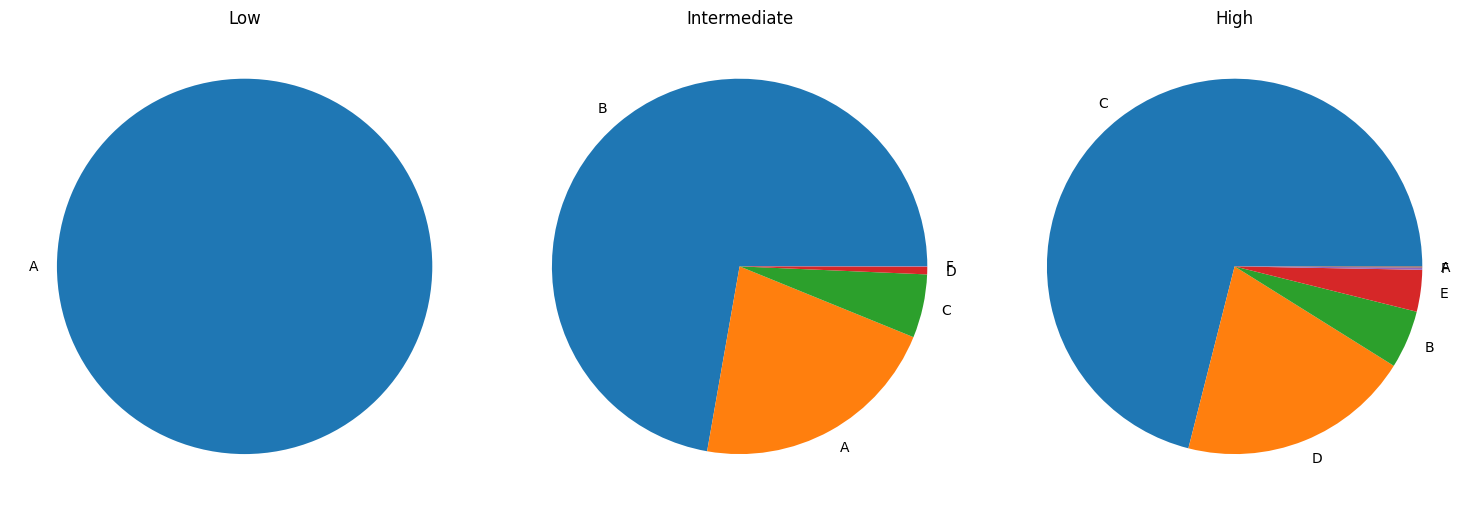

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
labels = [loans['Initial Rating'].unique()]
# Plot for Group 1
axs[0].pie(loans[loans['Loan Interest Rate'] == 0]['Initial Rating'].value_counts(), labels = loans[loans['Loan Interest Rate'] == 0]['Initial Rating'].value_counts().index)
axs[0].set_title('Low')

# Plot for Group 2
axs[1].pie(loans[loans['Loan Interest Rate'] == 1]['Initial Rating'].value_counts(), labels = loans[loans['Loan Interest Rate'] == 1]['Initial Rating'].value_counts().index)
axs[1].set_title('Intermediate')

# Plot for Group 3
axs[2].pie(loans[loans['Loan Interest Rate'] == 2]['Initial Rating'].value_counts(), labels = loans[loans['Loan Interest Rate'] == 2]['Initial Rating'].value_counts().index)
axs[2].set_title('High')

plt.tight_layout()
plt.show()

-The pie chart further proves our assumption

1. Now we are to invfestigate the relationship between loan type and loan amount, age and overdue status, verification and overdue status
2. Since we do not know the meaning of first bid, we will also investigate it

In [10]:
#grouped the loan amount into three categorie: {<10000: 0, 10000-30000: 1, >30000:2}
def categorize(value):
    if value < 10000:
        return 0
    elif value <30000:
        return 1
    else:
        return 2

loans['Loan Amount'] = loans['Loan Amount'].apply(categorize)

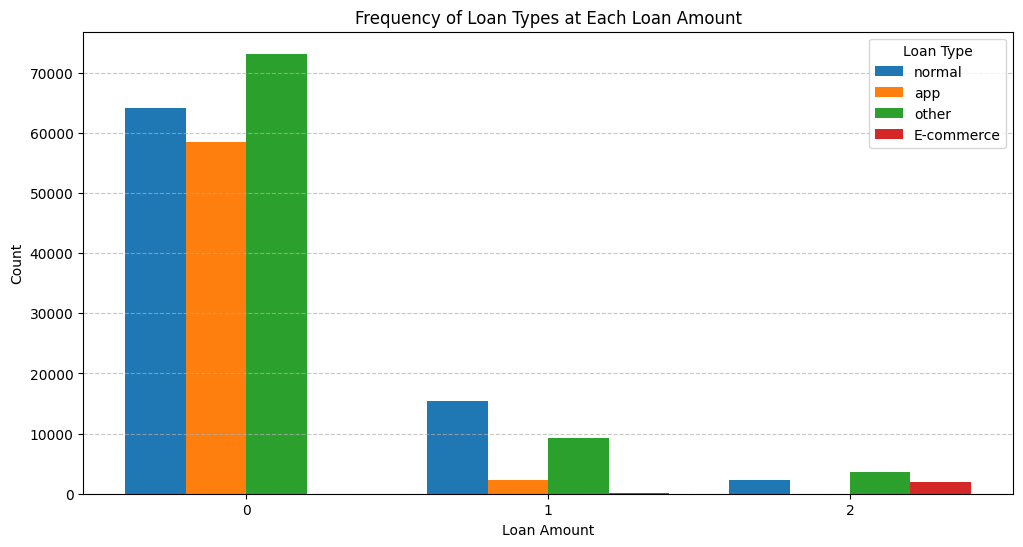

In [11]:
Loantype = loans['Loan Type'].unique()
LoanAmounts = loans['Loan Amount'].unique()
bar_width = 0.2
x = np.arange(len(LoanAmounts))
x = np.arange(len(LoanAmounts))

plt.figure(figsize=(12, 6))
for i, loantype in enumerate(Loantype):
    counts = loans[loans['Loan Type'] == loantype]['Loan Amount'].value_counts().sort_index()
    plt.bar(x + (i - 1.5) * bar_width, counts.reindex(LoanAmounts, fill_value=0), width=bar_width, label=loantype)


# Adding labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Frequency of Loan Types at Each Loan Amount')
plt.xticks(x, LoanAmounts)
plt.legend(title='Loan Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

E commerce as a currently flourishing industry, has attracted many people to join the industry. For startup enterprise, it's usual for them to ask for a great amount amount of loan.

([<matplotlib.patches.Wedge at 0x2b8e2882290>,
 [Text(0.2503929315546873, 1.0711224859125354, '1'),
  Text(-1.0082187599434715, -0.4398805884533309, '2'),
  Text(0.4051752560806522, -1.0226597732677167, '0'),
  Text(1.0376516456812017, -0.36507405031732154, '3'),
  Text(1.0960653520396308, -0.09295560261888514, '4'),
  Text(1.0999436540528391, -0.011133638618549418, '5')])

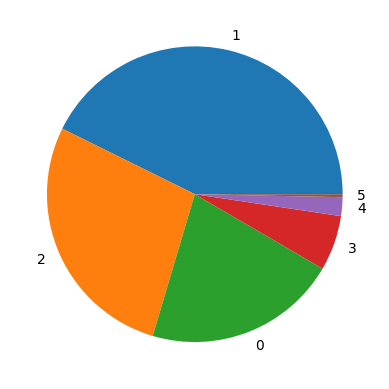

In [12]:
plt.pie(loans['Verification'].value_counts(), labels = loans['Verification'].value_counts().index)

- Out of Expectation, there is a few verification has completed for borrowers, probably due to the timing of the service, in which the time is the beginning of the flourishing of the e-commerce

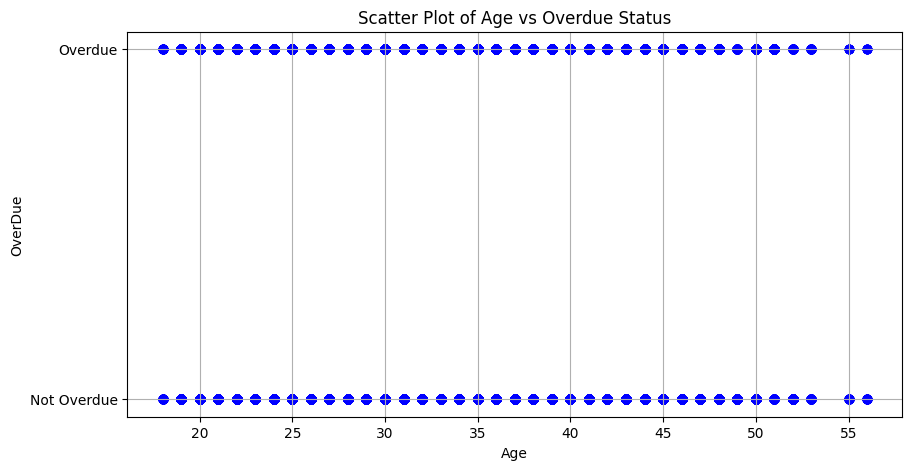

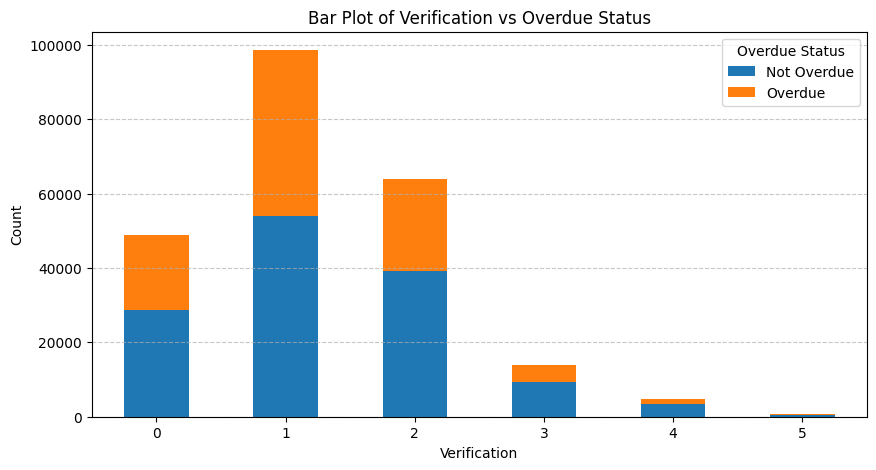

In [13]:
# Scatter plot for Age and Overdue Status
plt.figure(figsize=(10, 5))
plt.scatter(loans['Age'], loans['OverDue'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('OverDue')
plt.title('Scatter Plot of Age vs Overdue Status')
plt.yticks([0, 1], ['Not Overdue', 'Overdue'])
plt.grid(True)
plt.show()

# Bar plot for Verification and Overdue Status
verification_counts = loans.groupby(['Verification', 'OverDue']).size().unstack(fill_value=0)
verification_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Verification')
plt.ylabel('Count')
plt.title('Bar Plot of Verification vs Overdue Status')
plt.xticks(rotation=0)
plt.legend(title='Overdue Status', labels=['Not Overdue', 'Overdue'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- There is no clear trend in the relationship between overdue status and the age.
- However, it does show that the more verification, the less proportion of overdue

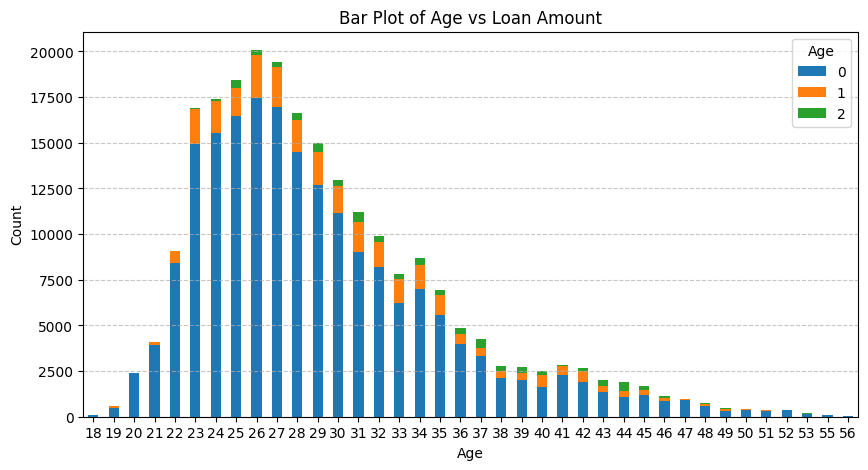

In [14]:
# Bar plot for Age and Loan Amount
Age_counts = loans.groupby(['Age', 'Loan Amount']).size().unstack(fill_value=0)
Age_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of Age vs Loan Amount')
plt.xticks(rotation=0)
plt.legend(title='Age', labels=[0, 1, 2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A high inccurence of loans among youngsters indicate a trend of early consumption amoung youngsters

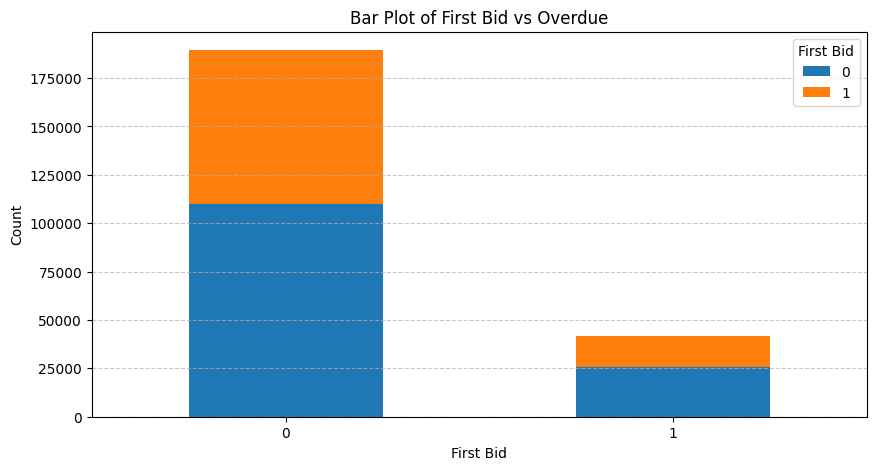

In [15]:
# Bar plot for First Bid and Overdue
Age_counts = loans.groupby(['First Bid', 'OverDue']).size().unstack(fill_value=0)
Age_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('First Bid')
plt.ylabel('Count')
plt.title('Bar Plot of First Bid vs Overdue')
plt.xticks(rotation=0)
plt.legend(title='First Bid', labels=[0, 1, 2])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now, we are using decision tree analysis to drop less relevant columns

In [16]:
#grouped the age into three categorie: {<22: 0, 22-35: 1, 35-50: 2, >50: 3}
def categorize(value):
    if value < 22:
        return 0
    elif value <35:
        return 1
    elif value < 50:
        return 2
    else:
        return 3

loans['Age'] = loans['Age'].apply(categorize)

In [17]:
y = loans['Repayment Status']
loans.drop('Repayment Status', axis=1, inplace=True)
x = loans

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230924 entries, 0 to 230923
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Loan Amount                             230924 non-null  int64  
 1   Loan Term                               230924 non-null  int64  
 2   Loan Interest Rate                      230924 non-null  int64  
 3   Loan Approval Date                      230924 non-null  object 
 4   Initial Rating                          230924 non-null  object 
 5   Loan Type                               230924 non-null  object 
 6   First Bid                               230924 non-null  int64  
 7   Age                                     230924 non-null  int64  
 8   Gender                                  230924 non-null  int64  
 9   Historical Successful Borrowing Count   230924 non-null  float64
 10  Historical Successful Borrowing Amount  2309

In [19]:
x['Initial Rating'] = x['Initial Rating'].replace({"A":0, "B":1,"C":2,"D":3,"E":4,"F":5},inplace=True)

In [20]:
#get dummies for object columns
x = pd.get_dummies(x, columns=['Loan Type', 'Loan Approval Date'], drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Analyze feature importances
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)

# Drop less influential columns
threshold = 0.00001  # Set a threshold for feature importance
less_influential_columns = feature_importances[feature_importances['importance'] < threshold].index
X_train.drop(columns=less_influential_columns, inplace=True)
X_test.drop(columns=less_influential_columns, inplace=True)

                                          importance
OverDue                                 9.983985e-01
Remaining Interest                      5.374968e-04
Remaining Principal                     4.106061e-04
Installments                            1.129037e-04
Gender                                  8.905620e-05
Loan Interest Rate                      8.883113e-05
Loan Amount                             8.311912e-05
Loan Approval Date_Q2                   4.240474e-05
Total Outstanding Principal             3.874605e-05
Principal Paid PCT                      3.812157e-05
Overdue Days before bid                 3.756731e-05
Successfully Paid Installments Num      3.710675e-05
Historical Overdue Repayment Periods    2.238771e-05
Historical Successful Borrowing Count   2.153778e-05
Age                                     1.837589e-05
Due Installments Num                    1.781124e-05
Historical Successful Borrowing Amount  5.308549e-06
Historical Normal Repayment Periods     1.2958

In [24]:
# Create logistic regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9230269568041571


c:\Users\13081\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Get the coefficients of the logistic regression model
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Get the feature names
feature_names = X_train.columns

# Construct the formula of the logistic regression model
formula = f"y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    formula += f" + {coef:.2f} * {feature_names[i]}"

# Print the formula
print("Formula of the logistic regression model:")
print(formula)

Formula of the logistic regression model:
y = 0.09  + 0.01 * Loan Amount + 0.13 * Loan Interest Rate + 0.10 * Age + 0.04 * Gender + 0.11 * Historical Successful Borrowing Count + 0.00 * Total Outstanding Principal + -0.08 * Historical Overdue Repayment Periods + 0.18 * Due Installments Num + 0.21 * Successfully Paid Installments Num + -0.03 * Overdue Days before bid + 0.17 * Installments + -0.23 * Remaining Principal + -0.02 * Remaining Interest + 0.02 * Principal Paid PCT + -0.12 * OverDue + 0.01 * Loan Approval Date_Q2


- The reason that initial rating become not important indicates a lack of reliability in the original scale of the rating
- The influence in age is probably caused by the fact that some borrowers may use the identity of elders to borrow, while elders would be less influenced by the debt.
- Q2 is usually the time for people who are unemployed from the company, therefore loans approved from Q2 may be more dangerous
